In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn import metrics

In [2]:
df_cost = pd.read_csv("InterviewData_Cost.csv")
df_rev = pd.read_csv("InterviewData_Rev.csv")

## Question 1

In [3]:
df_merge = pd.merge(df_cost,df_rev, how='outer', on=['date','source_id'])
df_merge

,date,source_id,cost,revenue
0,10/17/14,PA0577,7168.0,8417.0
1,8/17/14,PA0354,7615.0,4200.0
2,1/7/14,PA0607,4054.0,7935.0
3,8/25/14,PA0745,9317.0,5536.0
4,11/30/14,PA0923,5586.0,NaN
...,...,...,...,...
14613,12/29/14,PA0958,NaN,7406.0
14614,3/19/14,PA0732,NaN,6584.0
14615,9/24/14,PA0174,NaN,3827.0
14616,10/26/14,PA0318,NaN,533.0


## Question 2

In [5]:
df_merge[pd.notnull(df_merge["cost"]) & pd.isnull(df_merge["revenue"])].drop(columns='revenue')


,date,source_id,cost
4,11/30/14,PA0923,5586.0
6,12/17/14,PA0952,6662.0
7,5/22/14,PA0411,4795.0
9,10/14/14,PA0168,9651.0
10,2/13/14,PA0354,2752.0
...,...,...,...
9993,12/7/14,PA0900,2037.0
9994,7/11/14,PA0474,726.0
9995,1/10/14,PA0830,6202.0
9996,1/31/14,PA0467,7057.0


## Question 3

In [6]:
grouped_sou = df_merge.groupby("source_id").revenue.sum().nlargest(4).reset_index()
grouped_sou

,source_id,revenue
0,PA0527,1385747.0
1,PA0308,1338615.0
2,PA0352,1309685.0
3,PA0552,1283190.0


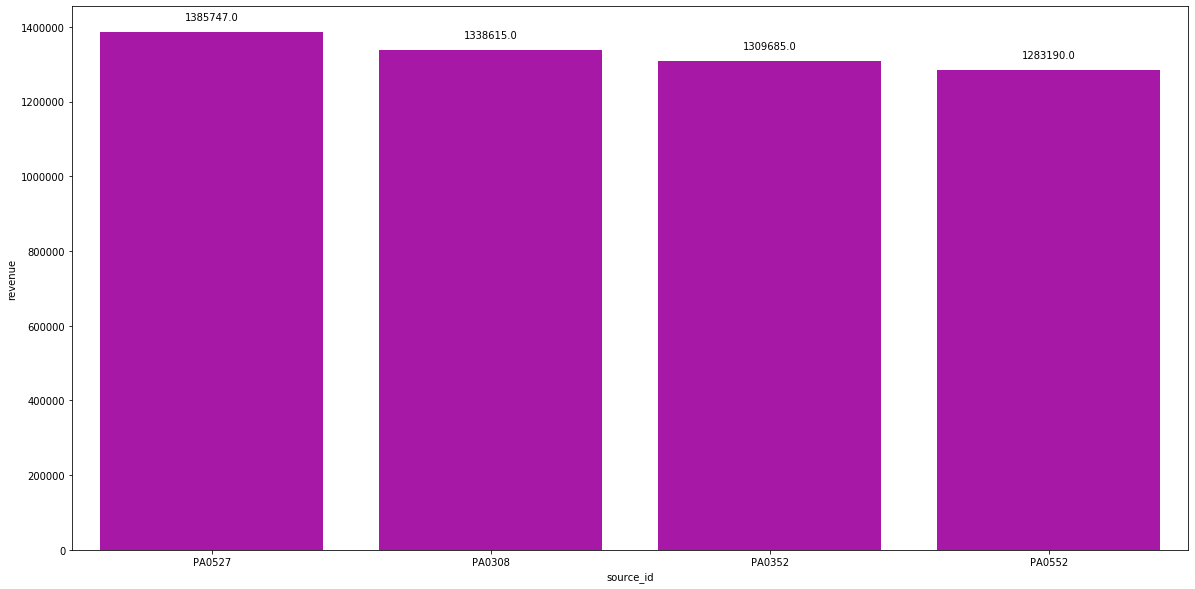

In [7]:
plt.figure(figsize=(20,10))
splot=sns.barplot(x = 'source_id', y='revenue',data=grouped_sou, color='m')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 15), textcoords = 'offset points')


<p style="font-family:Times; font-size: 20px"> In this problem, Bar Chart is the efficient way to visualize the top 4 source_id's based on their revenue </p>

## Question 4

In [8]:
df= pd.read_csv("InterviewData_Activity.csv")
dummy_genders = pd.get_dummies(df['gender'], prefix = 'gender')
dummy_metro = pd.get_dummies(df['metropolitan_area'], prefix = 'metro_area')
dummy_device = pd.get_dummies(df['device_type'], prefix = 'device')
cols_to_keep = ['active', 'age']
activity_data = df[cols_to_keep].join(dummy_genders.loc[:, 'gender_M':])
activity_data = activity_data.join(dummy_metro.loc[:, 'metro_area_Birmingham':])
activity_data = activity_data.join(dummy_device.loc[:, 'device_Mobile':])
activity_data = sm.add_constant(activity_data, prepend=False)
explanatory_cols = activity_data.columns[1:]
full_logit_model = sm.GLM(activity_data['active'], activity_data[explanatory_cols], family=sm.families.Binomial())
result = full_logit_model.fit()

In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 5420
Model:                            GLM   Df Residuals:                     5408
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3613.1
Date:                Wed, 14 Oct 2020   Deviance:                       7226.3
Time:                        13:26:28   Pearson chi2:                 5.38e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       0.0136      0.003      5.180      0.000       0.008       0.019
gender_M                 -0.6103      0.083     -7.343      0.000      -0.773      -0.447
metro_area_Birmingham    -0.0547      0.095     -0.576      0.564      -0.241       0.131
metro_area_Charlotte     -1.8619      0.337     -5.529      0.000      -2.522      -1.202
metro_area_Detroit       -0.0792      0.115     -0.689      0.491      -0.304       0.146
metro_area_Houston       -0.4496      0.093     -4.850      0.000      -0.631      -0.268
metro_area_Mobile        -1.7244      0.259     -6.655      0.000      -2.232      -1.217
metro_area_Nashville     22.4506   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
metro_area_Tampa          0.1370      0.104      1.312      0.189      -0.068       0.342
device_Mobile            -1.5004      0.264     -5.685      0.000      -2.018      -0.983
device_Tablet            -1.2342      0.269     -4.585      0.000      -1.762      -0.707
const                     1.1553      0.290      3.991      0.000       0.588       1.723
=========================================================================================
"""

In [26]:
def Accuracy(x, y):
    predict=[]
    for value in result.predict(x).tolist():
        if value >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
    matrix = metrics.confusion_matrix(y, predict)
    TP = matrix[0][0]
    TN = matrix[1][1]
    FP = matrix[1][0]
    FN = matrix[0][1]
    print(matrix)    
    print("Accuracy: ", (TP + TN) / (TP + TP + FN + FP))
    print("Precision: ", (TN) / (TN + FN))

In [27]:
Accuracy(activity_data[explanatory_cols], activity_data['active'])

[[1626 1164]
 [1109 1521]]
Accuracy:  0.5695927601809955
Precision:  0.5664804469273743


## Question 5

In [28]:
training_data = activity_data[1:4000]
test_data = activity_data[4001:].copy()
training_logit_model = sm.GLM(training_data['active'], training_data[explanatory_cols], family=sm.families.Binomial())
training_result = training_logit_model.fit()

In [29]:
Accuracy(test_data[explanatory_cols], test_data['active'])

[[787 503]
 [ 53  76]]
Accuracy:  0.4051643192488263
Precision:  0.13126079447322972


<p style="font-family:Times; font-size: 20px">The first model got accuracy more than the second model where we performed train test split procedure this is because the first model is biased, First model was trained and evaluated on the same data. But, the second model is being validated completely on new and unknown data.
    </p>
<p style="font-family:Times; font-size: 20px">The accuracy represents the prediction ability of the model.</p> 

## Question 6

In [31]:
df_par =  pd.read_csv("InterviewData_Parsing.csv")
df_par["data_to_parse"] = df_par["data_to_parse"].apply(lambda x: eval(str("{" + x).replace("]", "")))


In [34]:
df_par["Col_add_1"] = df_par["data_to_parse"].apply(lambda x: x["value"].split(";")[0])
df_par["Col_add_2"] = df_par["data_to_parse"].apply(lambda x: x["value"].split(";")[1])
df_par["Col_add_3"] = df_par["data_to_parse"].apply(lambda x: x["value"].split(";")[2])
df_par["Col_add_4"] = df_par["data_to_parse"].apply(lambda x: x["value"].split(";")[3])


In [35]:
df_par

,userid,data_to_parse,Col_add_1,Col_add_2,Col_add_3,Col_add_4
0,54f3ad9a29ada,{'value': 'N;U;A7;W'},N,U,A7,W
1,54f69f2de6aec,{'value': 'N;U;I6;W'},N,U,I6,W
2,54f650f004474,{'value': 'Y;U;A7;W'},Y,U,A7,W
3,54f52e8872227,{'value': 'N;U;I1;W'},N,U,I1,W
4,54f64d3075b72,{'value': 'Y;U;A7;W'},Y,U,A7,W
...,...,...,...,...,...,...
948,54f5eb32d1a5b,{'value': 'N;U;A1;W'},N,U,A1,W
949,54f34bd1a812a,{'value': 'N;C;A2;L'},N,C,A2,L
950,54f34aa1e1f00,{'value': 'Y;U;A1;W'},Y,U,A1,W
951,54f47d97846bc,{'value': 'N;U;I4;L'},N,U,I4,L


### Question B

In every marketing department, Conversion rate is most the important landing page metric to keep the track of.

Conversion rate is the percentage of users who take the desired action on the landing page. It helps to understand if a landing page is performing well, What parts of your landing page might need to be improved, Whether it’s worth the time (and money) to keep using the page.

                        conversion rate = (# of conversions/total  # of visitors) * 100


conversion rate can be improved by 
 <li>Speed up mobile site and improve site design</li>
 <li>Experiment with Layout, Content, Style and Functionality on Landing Pages</li>
 <li>Implementing new offers, coupons for the customers based on their conversion rate</li>

There are few more metrics which are very important to consider to campaign

1.) Bounce rate - It’s the percentage of all users who leave after they view a single page.
      This can be improved by
      <li> Improve Content’s Readability</li>
      <li> Avoid Popups – Don’t Disrupt the UX</li>
      <li> Keep the Blog Fresh With the Right Content</li>

                
                
2.) Pageviews - Pageviews can give you a sense of how many people come to our landing page. But looking at pageviews might help us understand why people aren’t becoming customers.
       Pageviews can be improved by
       <li> Creating a great user experience</li>
       <li> Give Visitors More Relevant Stuff</li>
       
3.) Time spent on page - The type of landing page you have can have an effect on how long people stay on it. It can be improved by adding new resources, including user friendly images.

4.) Sessions by source - It tells us which channels all of our traffic comes from. It’s not enough to just know that we get, It’s important to know where it comes from. so that we can target the people(customers) in effective way.

